<a href="https://colab.research.google.com/github/Abhishek-Potekar/8thJune_B1_AI/blob/day30/face_recognition_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 9.0 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=c433e5f3c2f3c2a5f6945b328cf653a47e879565d579f427046bfd3efccb60bc
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
!pip install dlib

In [57]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import dlib

In [5]:
import face_recognition as fr

In [25]:
img1 = fr.load_image_file('messi.jpg')
img2 = fr.load_image_file('ronaldo.jpg')
img3 = fr.load_image_file('messi2.jpeg')

In [27]:
img1_enc = fr.face_encodings(img1)[0]

In [28]:
img1_enc.shape

(128,)

In [29]:
img2_enc = fr.face_encodings(img2)[0]
img3_enc = fr.face_encodings(img3)[0]

In [30]:
img2_enc.shape

(128,)

In [31]:
img3_enc.shape

(128,)

In [32]:
db_d = {'features':[img1_enc,img2_enc,img3_enc],'label':['messi','ronaldo','messi']}

In [33]:
db = pd.DataFrame(db_d)

In [34]:
db

,features,label
0,"[-0.08195227384567261, 0.11779573559761047, -0...",messi
1,"[-0.19721060991287231, 0.10987282544374466, 0....",ronaldo
2,"[-0.10480594635009766, 0.21991507709026337, 0....",messi


In [35]:
pd.to_pickle(db,'face_db.pkl')

In [36]:
loaded_db = pd.read_pickle('face_db.pkl')

In [37]:
loaded_db

,features,label
0,"[-0.08195227384567261, 0.11779573559761047, -0...",messi
1,"[-0.19721060991287231, 0.10987282544374466, 0....",ronaldo
2,"[-0.10480594635009766, 0.21991507709026337, 0....",messi


In [38]:
loaded_db['features'].values.tolist()

[array([-0.08195227,  0.11779574, -0.01635292, -0.0146584 , -0.188673  ,
         0.12580375,  0.00854693, -0.04944248,  0.10620625, -0.08761712,
         0.25661495, -0.11075938, -0.29567096, -0.04430806, -0.07967893,
         0.1448445 , -0.11662868, -0.09750847, -0.21017459, -0.1777612 ,
        -0.02921942,  0.0291725 ,  0.00324159,  0.04106332, -0.23219585,
        -0.27096963, -0.00614031, -0.16593078,  0.05394635, -0.12740046,
        -0.07219981,  0.09745444, -0.10993684, -0.07105461,  0.04151047,
         0.05223297, -0.03908633, -0.0590631 ,  0.21769148, -0.09034602,
        -0.13403608,  0.12259664,  0.13738072,  0.28944415,  0.12054246,
         0.02488645,  0.02998331, -0.06350255,  0.15924871, -0.19959503,
         0.11080743,  0.15489602,  0.18870747,  0.11492246,  0.05576962,
        -0.18536387, -0.02268934,  0.20573851, -0.13691887,  0.05025001,
         0.04946823, -0.00425841, -0.05370801, -0.12470815,  0.22294672,
         0.16066083, -0.11119935, -0.18407537,  0.1

In [39]:
newenc1 = fr.face_encodings(fr.load_image_file('messi3.jpg'))[0]

In [40]:
res = fr.compare_faces(loaded_db['features'].values.tolist(),newenc1)

In [41]:
res

[True, False, True]

In [42]:
loaded_db['label'][res].values[0]

'messi'

In [43]:
def predict(img_name):
    newenc1 = fr.face_encodings(fr.load_image_file(img_name))[0]
    res = fr.compare_faces(loaded_db['features'].values.tolist(),newenc1,tolerance=0.5)    
    if sum(res):
        return loaded_db['label'][res].values[0]
    return 'unknown'

In [44]:
predict('ronaldo2.jpg')

'ronaldo'

In [45]:
predict('bale.jpg')

'unknown'

In [46]:
predict('messi3.jpg')

'messi'

In [47]:
h = cv2.HOGDescriptor()

In [48]:
h.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [49]:
h

<HOGDescriptor 0x7f4e48bebf50>

In [50]:
h.svmDetector

array([[ 0.05359386],
       [-0.14721455],
       [-0.0553217 ],
       ...,
       [-0.04229729],
       [ 0.10666174],
       [-6.6657915 ]], dtype=float32)

In [51]:
h.svmDetector.shape

(3781, 1)

In [52]:
ppl = cv2.imread('people2.jpg')

In [53]:
val = h.detectMultiScale(ppl, scale=1.1, winStride=(4,4),padding=(8,8))

In [60]:
val

(array([[ 82,  48, 114, 228],
        [162,   0, 130, 254],
        [ 29,   0, 132, 253],
        [226,   0, 129, 243]], dtype=int32), array([[1.00990517],
        [0.49494913],
        [0.98106909],
        [0.77024273]]))

In [67]:
from google.colab.patches import cv2_imshow

1.0099051673314534
0.9810690915037412
0.7702427268377505
0.4949491338338703


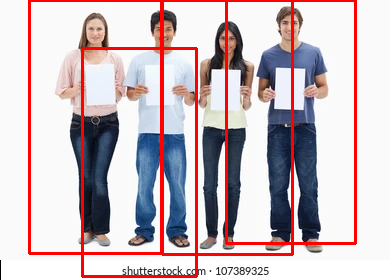

-1

In [73]:
ppl = cv2.imread('people2.jpg')
h = cv2.HOGDescriptor()
h.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
val = h.detectMultiScale(ppl, scale=1.1, winStride=(3,3),padding=(8,8))
for i,(x,y,w,h) in enumerate(val[0]):
    print(val[1][i][0])
    if val[1][i][0]>0.4:
        cv2.rectangle(ppl, (x,y), (x+w, y+h), (0,0,255),2)
cv2_imshow(ppl)
cv2.waitKey(0)

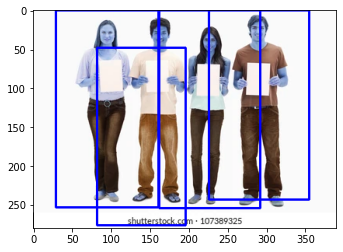

In [75]:
plt.imshow(ppl)